In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset
df = pd.read_csv(r'/2008.csv')
print(df.columns)
df.shape

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


(2389217, 29)

In [3]:
df['Hour'] = df['DepTime'] // 100
# Define a function to categorize hours into hourly blocks
def categorize_hour(hour):
    if 0 <= hour < 6:
        return '00:00-05:59'
    elif 6 <= hour < 12:
        return '06:00-11:59'
    elif 12 <= hour < 18:
        return '12:00-17:59'
    else:
        return '18:00-23:59'

# Apply the categorization function to create the 'DEP_TIME_BLK' column
df['DEP_TIME_BLK'] = df['Hour'].apply(categorize_hour)

In [4]:
#Find the Delay_15 ( Flight delayed by at least 15 min)
df['Delay_15']=df['ArrDelay'] > 15

In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Origin', 'Dest', 'UniqueCarrier', 'DEP_TIME_BLK']:
    df[column] = label_encoder.fit_transform(df[column])


In [6]:
# Select the specified columns
selected_columns = ['DayOfWeek', 'Origin', 'Dest', 'UniqueCarrier', 'WeatherDelay', 'Delay_15', 'DEP_TIME_BLK']
df = df[selected_columns]


In [7]:
columns_to_check = ['DayOfWeek', 'Origin', 'Dest',
'UniqueCarrier', 'WeatherDelay', 'Delay_15', 'DEP_TIME_BLK']

# Check for missing values in the specified columns
missing_values = df[columns_to_check].isnull().sum()

# Print the missing values count for each column
print(missing_values)


DayOfWeek              0
Origin                 0
Dest                   0
UniqueCarrier          0
WeatherDelay     1804634
Delay_15               0
DEP_TIME_BLK           0
dtype: int64


In [8]:
# Handle missing values in 'WeatherDelay' column
df['WeatherDelay'].fillna(0, inplace=True)

<ipython-input-8-c4b358928e19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WeatherDelay'].fillna(0, inplace=True)


In [9]:
# Define the target variable
y = df['Delay_15']
# Drop the target variable from the features
X = df.drop(columns=['Delay_15'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print("Decision Tree Accuracy = ",accuracy_dt)

Decision Tree Accuracy =  0.7767402471657416


In [11]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print the accuracy for lr
print("Logistic Regression Accuracy = ",accuracy_lr)

Logistic Regression Accuracy =  0.7796491463043727


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score

# Decision Tree Metrics
print("Decision Tree Metrics:")
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]):.2f}")
print("\n")

# Logistic Regression Metrics
print("Logistic Regression Metrics:")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1]):.2f}")

# Determine which model performed better based on specific metrics, e.g., F1 Score or ROC AUC
if f1_score(y_test, y_pred_dt) > f1_score(y_test, y_pred_lr):
    print("Decision Tree has a higher F1 Score.")
else:
    print("Logistic Regression has a higher F1 Score.")

if roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]) > roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1]):
    print("Decision Tree has a higher ROC AUC Score.")
else:
    print("Logistic Regression has a higher ROC AUC Score.")


Decision Tree Metrics:
Decision Tree Accuracy: 0.78
Confusion Matrix:
[[527695  20597]
 [139428  29046]]
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.96      0.87    548292
        True       0.59      0.17      0.27    168474

    accuracy                           0.78    716766
   macro avg       0.69      0.57      0.57    716766
weighted avg       0.74      0.78      0.73    716766

F1 Score: 0.27
ROC AUC Score: 0.67


Logistic Regression Metrics:
Logistic Regression Accuracy: 0.78
Confusion Matrix:
[[548132    160]
 [157780  10694]]
Classification Report:
              precision    recall  f1-score   support

       False       0.78      1.00      0.87    548292
        True       0.99      0.06      0.12    168474

    accuracy                           0.78    716766
   macro avg       0.88      0.53      0.50    716766
weighted avg       0.83      0.78      0.70    716766

F1 Score: 0.12
ROC AUC Score: 0.62
Decisi

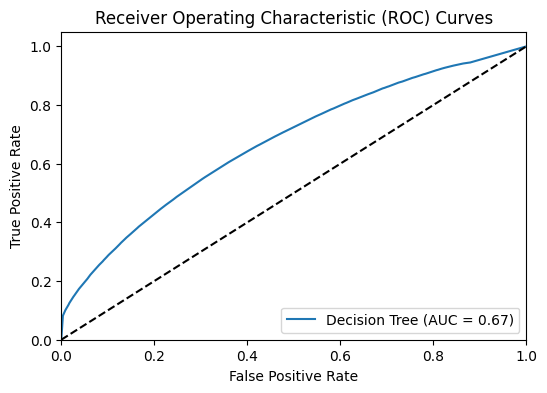

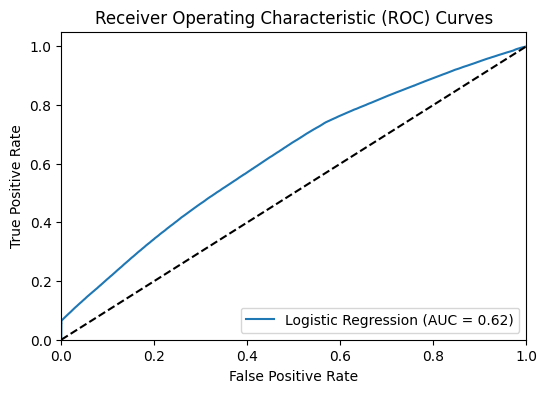

Decision Tree AUC=  0.6713254029334437
Logistic Regression AUC=  0.6238135363841711
Decision Tree has a higher AUC and may be the preferred model.


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Decision Tree ROC curve and AUC
decision_tree_proba = decision_tree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Logistic Regression ROC curve and AUC
logistic_regression_proba = logistic_regression.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_regression_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curves
#ROC curve for decision tree
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
#plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

# ROC curve for logistic Regression

# Plot ROC curves
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

# Show the plot
plt.show()

print("Decision Tree AUC= ",roc_auc_dt)
print("Logistic Regression AUC= ",roc_auc_lr)
# Determine which model to select based on AUC
if roc_auc_dt > roc_auc_lr:
    print("Decision Tree has a higher AUC and may be the preferred model.")
else:
    print("Logistic Regression has a higher AUC and may be the preferred model.")
